# Descarga Sentinel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
from shapely.geometry import MultiPolygon, Polygon

In [31]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [5]:
user = 'edieraristizabal' 
password = 'M*********8' 

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [68]:
aoi="POINT(6.15 -75.31)"

In [69]:
products = api.query(aoi, 
                     date=('20190101', '20191231'), 
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0,30))

In [70]:
len(products)

23

In [135]:
products_gdf = api.to_dataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted.head(5)

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid
d99e1352-c89a-49e9-a8e3-db3eb5c61e92,S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-20T08:09:29.024Z, Instrument: MS...",2019-02-20 08:09:29.024,2019-02-20 08:09:29.024,2019-02-20 15:39:25.716,10228,49,...,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,176.66 MB,S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_2...,NaN,S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_2...,d99e1352-c89a-49e9-a8e3-db3eb5c61e92
ee21c5d6-53d6-4fdc-bfa8-588600afc240,S2B_MSIL2A_20190112T073919_N0211_R063_T31CES_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-12T07:39:19.024Z, Instrument: MS...",2019-01-12 07:39:19.024,2019-01-12 07:39:19.024,2019-01-12 13:29:34.554,9670,63,...,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,738.30 MB,S2B_MSIL2A_20190112T073919_N0211_R063_T31CES_2...,NaN,S2B_MSIL2A_20190112T073919_N0211_R063_T31CES_2...,ee21c5d6-53d6-4fdc-bfa8-588600afc240
db6e1b08-2a0a-4d2f-9c6d-730219611a13,S2B_MSIL2A_20190201T073919_N0211_R063_T31CES_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-01T07:39:19.024Z, Instrument: MS...",2019-02-01 07:39:19.024,2019-02-01 07:39:19.024,2019-02-01 14:03:58.513,9956,63,...,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,774.48 MB,S2B_MSIL2A_20190201T073919_N0211_R063_T31CES_2...,NaN,S2B_MSIL2A_20190201T073919_N0211_R063_T31CES_2...,db6e1b08-2a0a-4d2f-9c6d-730219611a13
db0fb868-b89d-4c7e-8f89-bdfc737295c3,S2B_MSIL2A_20190122T073919_N0211_R063_T31CES_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-01-22T07:39:19.024Z, Instrument: MS...",2019-01-22 07:39:19.024,2019-01-22 07:39:19.024,2019-01-22 20:21:10.600,9813,63,...,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,772.95 MB,S2B_MSIL2A_20190122T073919_N0211_R063_T31CES_2...,NaN,S2B_MSIL2A_20190122T073919_N0211_R063_T31CES_2...,db0fb868-b89d-4c7e-8f89-bdfc737295c3
c464d572-3348-499d-b51f-0e59a22e45ca,S2B_MSIL2A_20190201T073919_N0211_R063_T32CMB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-01T07:39:19.024Z, Instrument: MS...",2019-02-01 07:39:19.024,2019-02-01 07:39:19.024,2019-02-01 14:06:45.374,9956,63,...,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,773.50 MB,S2B_MSIL2A_20190201T073919_N0211_R063_T32CMB_2...,NaN,S2B_MSIL2A_20190201T073919_N0211_R063_T32CMB_2...,c464d572-3348-499d-b51f-0e59a22e45ca


In [79]:
api.download("d99e1352-c89a-49e9-a8e3-db3eb5c61e92")

Downloading: 100%|██████████████████████████████████████████████████████████████████| 185M/185M [00:28<00:00, 6.41MB/s]
MD5 checksumming: 100%|█████████████████████████████████████████████████████████████| 185M/185M [00:02<00:00, 69.6MB/s]


{'id': 'd99e1352-c89a-49e9-a8e3-db3eb5c61e92',
 'title': 'S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112',
 'size': 185301921,
 'md5': 'BFE66DC5E1D5817332B337E7F9B525A2',
 'date': datetime.datetime(2019, 2, 20, 8, 9, 29, 24000),
 'footprint': 'POLYGON((7.36390290962209 -74.77457269363185,7.300468863618169 -74.80414487333516,7.018287481279597 -74.93374526938884,6.731957757193908 -75.06320838247532,6.441074033631208 -75.19238833900421,6.145600673417892 -75.32125367582307,5.8451020344933 -75.44977024300742,5.539282504625072 -75.57783330970516,5.382337217537358 -75.64216362253737,5.588231062679681 -74.76247216773208,7.36390290962209 -74.77457269363185))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d99e1352-c89a-49e9-a8e3-db3eb5c61e92')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 20, 15, 44, 19, 346000),
 'Ingestion Date': datetime.datetime(2019, 2, 20, 15, 39, 25, 716000),
 'path': '.\\S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_

In [82]:
!unzip S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.zip --quite

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [85]:
from zipfile import ZipFile
ZipFile("S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.zip").extractall()

In [86]:
from osgeo import gdal

In [ ]:
!gdalinfo S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.zip

In [ ]:
!gdalinfo S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.SAFE\MTD_MSIL2A.xml

Tener en cuenta la primera parte del archivo SENTINEL2_L2A, la ultima parte puede cambiar de acuerdo con el nivel de procesamiento de la imagen 'L1C', etc. Al igual que el CRS en términos de EPSG, el cual puede ser obtenido de la función anterior.

In [ ]:
!gdalinfo SENTINEL2_L2A:S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.SAFE\MTD_MSIL2A.xml:10m:EPSG_32732

In [139]:
!gdal_translate SENTINEL2_L2A:S2B_MSIL2A_20190220T080929_N0211_R049_T32CMB_20190220T115112.SAFE\MTD_MSIL2A.xml:10m:EPSG_32732 \
                 10m.tif \
                 -co TILED=YES --config GDAL_CACHEMAX 1000 --config GDAL_NUM_THREADS 2

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


In [151]:
dataset = gdal.Open('10m.tif')
print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000019A6DAE5ED0> >


In [152]:
num_bands = dataset.RasterCount
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 4



In [154]:
b1 = dataset.GetRasterBand(1)
b1 = b1.ReadAsArray()
print(b1)

[[8640 8616 8616 ...    0    0    0]
 [8560 8528 8616 ...    0    0    0]
 [8600 8504 8504 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


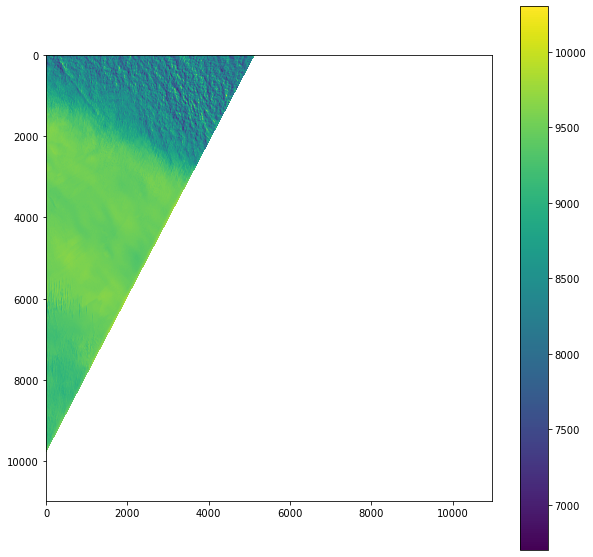

In [155]:
b1=np.where(b1==0,np.nan,b1)
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.imshow(b1)
plt.colorbar();
plt.show()